In [1]:
import scanpy as sc
import graph_tool.all as gt
import schist
import pandas as pd
import anndata
import pickle
import mygene
import scipy.stats
import statsmodels.api as sm
%pylab
%matplotlib inline

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
#weighted nSBM weighted model
w_weighted_l1=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_wQuartzseq_l1.pkl','rb'))
w_weighted_l2=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_wQuartzseq_l2.pkl','rb'))
#weighted nSBM flat model
w_flat_l1=pickle.load(open('cell_affinity_significance/minimize_linear_flat_wQuartzseq_l1.pkl','rb'))
w_flat_l2=pickle.load(open('cell_affinity_significance/minimize_linear_flat_wQuartzseq_l2.pkl','rb'))
#unweighted nSBM weighted model
unw_weighted_l1=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_Quartzseq_l1.pkl','rb'))
unw_weighted_l2=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_Quartzseq_l2.pkl','rb'))
unw_weighted_l3=pickle.load(open('cell_affinity_significance/minimize_linear_weighted_Quartzseq_l3.pkl','rb'))
#unweighted nSBM flat model
unw_flat_l1=pickle.load(open('cell_affinity_significance/minimize_linear_flat_Quartzseq_l1.pkl','rb'))
unw_flat_l2=pickle.load(open('cell_affinity_significance/minimize_linear_flat_Quartzseq_l2.pkl','rb'))
unw_flat_l3=pickle.load(open('cell_affinity_significance/minimize_linear_flat_Quartzseq_l3.pkl','rb'))

In [12]:
#weighted nSBM
adata=schist.io.read('../scRNA_paga/state_adata/Quartzseq_minimize_weighted')
#weight model
weighted_w_info_l1=load('cell_affinity_significance/wQuartzseq_weighted_level_1.npz')
weighted_w_info_l2=load('cell_affinity_significance/wQuartzseq_weighted_level_2.npz')
weighted_w_info_l3=load('cell_affinity_significance/wQuartzseq_weighted_level_3.npz')
#flat model
weighted_f_info_l1=load('cell_affinity_significance/wQuartzseq_weighted_level_1.npz')
weighted_f_info_l2=load('cell_affinity_significance/wQuartzseq_weighted_level_2.npz')
weighted_f_info_l3=load('cell_affinity_significance/wQuartzseq_weighted_level_3.npz')

In [13]:
#unweighted nSBM
adata=schist.io.read('../scRNA_paga/state_adata/Quartzseq_minimize')
#weight model
unweighted_w_info_l1=load('cell_affinity_significance/Quartzseq_weighted_level_1.npz')
unweighted_w_info_l2=load('cell_affinity_significance/Quartzseq_weighted_level_2.npz')
unweighted_w_info_l3=load('cell_affinity_significance/Quartzseq_weighted_level_3.npz')
#flat model
unweighted_f_info_l1=load('cell_affinity_significance/Quartzseq_weighted_level_1.npz')
unweighted_f_info_l2=load('cell_affinity_significance/Quartzseq_weighted_level_2.npz')
unweighted_f_info_l3=load('cell_affinity_significance/Quartzseq_weighted_level_3.npz')

In [3]:
markers=pd.read_excel("markers_hca.ods", engine="odf",header=2,index_col=None)

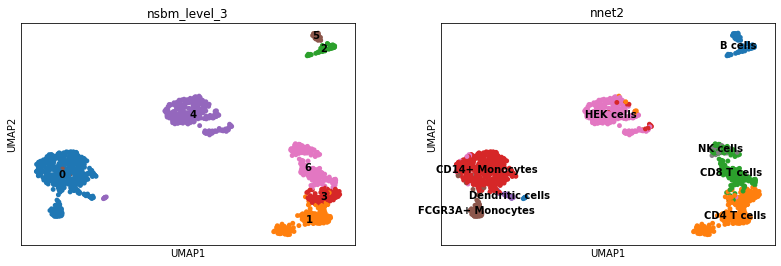

In [21]:
sc.pl.umap(adata,color=['nsbm_level_3','nnet2'],legend_loc ='on data')

In [18]:
significative=0    
for group in adata.obs.nsbm_level_1.cat.categories:
    sig_level=len([x for x in f_pvals_l1[:,int(group)] if x <0.05])
    significative=significative+sig_level
print(significative)

36950


# 1) Number of genes
### flat model

In [ ]:
w=weighted_w_info_l1
f=weighted_f_info_l1
w_pvals=w['pvals']
w_fdr=w['fdr']
w_scores=w['scores']
f_pvals=f['pvals']
f_fdr=f['fdr']
f_scores=f['scores']

(array([2200.,  277.,  241.,  246.,  227.,  201.,  200.,  173.,  140.,
         177.,  147.,  158.,  123.,  152.,  177.,  175.,  201.,  162.,
         190.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

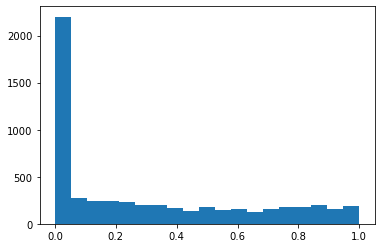

In [10]:
hist(f_padj_l2[:,9],bins=np.linspace(0,1,20))

### weigthed model

(array([2163.,  289.,  250.,  227.,  209.,  232.,  191.,  181.,  154.,
         153.,  165.,  159.,  139.,  145.,  148.,  179.,  190.,  199.,
         194.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

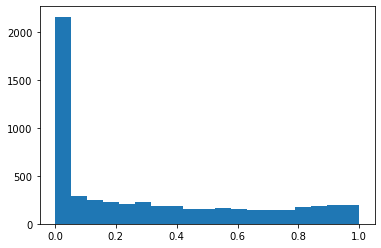

In [11]:
hist(w_padj_l2[:,9],bins=np.linspace(0,1,20))

### scanpy

In [7]:
sc.tl.rank_genes_groups(adatam,groupby='nsbm_level_2',n_genes=-1)

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


(array([1796.,  316.,  246.,  276.,  272.,  237.,  192.,  166.,  140.,
         170.,  175.,  177.,  173.,  179.,  184.,  227.,  209.,  205.,
         226.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <a list of 19 Patch objects>)

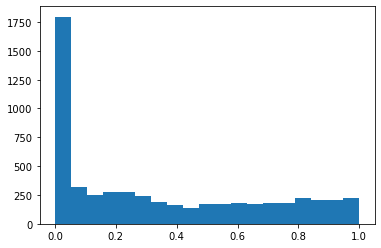

In [9]:
hist([adatam.uns['rank_genes_groups']['pvals_adj'][x][9] for x in range(5566)],bins=np.linspace(0,1,20))

# 2) Markers

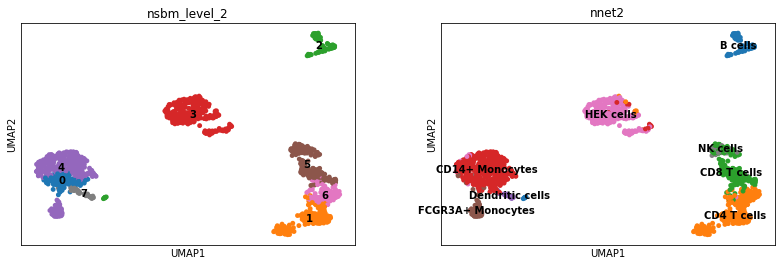

nnet2,B cells,CD4 T cells,CD8 T cells,CD14+ Monocytes,Dendritic cells,FCGR3A+ Monocytes,HEK cells,NK cells
nsbm_level_2,,,,,,,,
0,0,0,0,96,0,7,1,1
1,0,206,1,0,0,0,0,0
2,74,0,0,0,0,0,0,0
3,0,5,0,18,0,0,235,0
4,0,0,0,240,0,57,9,0
5,0,0,145,0,0,0,0,33
6,0,88,20,0,0,0,1,0
7,0,0,0,11,18,0,0,0


In [8]:
sc.pl.umap(adata, color=['nsbm_level_2','nnet2'],legend_loc='on data')
pd.crosstab(adata.obs['nsbm_level_2'],adata.obs['nnet2'])

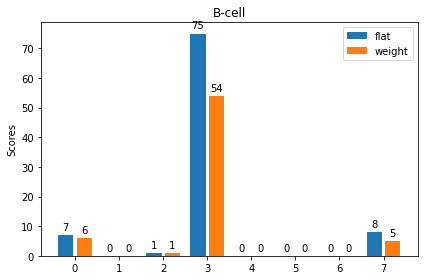

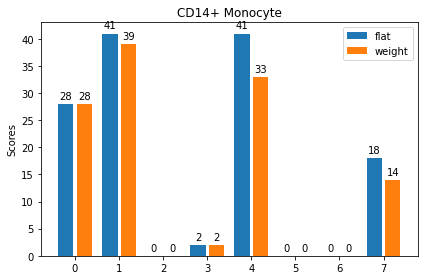

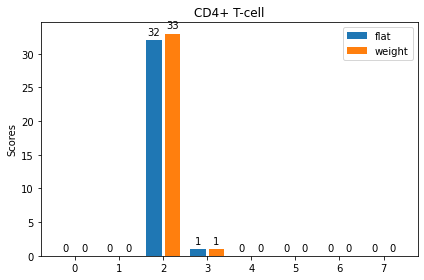

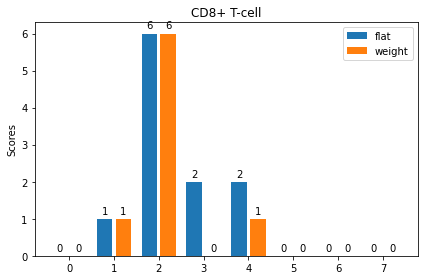

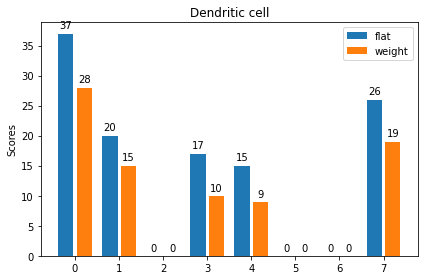

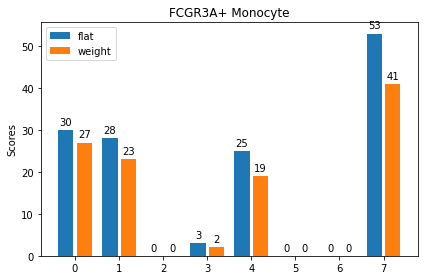

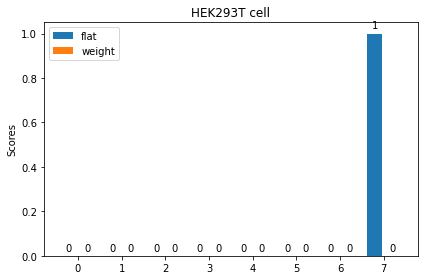

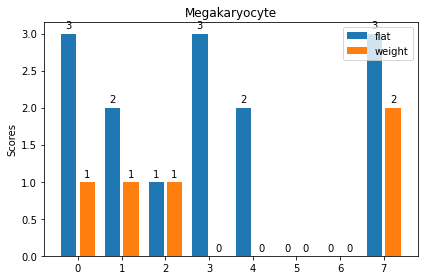

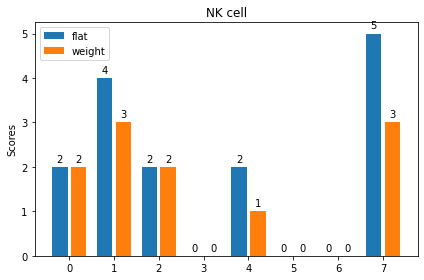

In [11]:
for celltype in range(len(markers.columns)):
    wm=[]
    fm=[]
    flat=0
    weight=0
    gene=[str(i) for i in markers.iloc[:,celltype]]
    for i in adata.obs['nsbm_level_2'].cat.categories:
        high_exp=[d for d in unw_flat_l2[i]['scores'] if d>1]
        for j in range(len(high_exp)):
            if unw_flat_l2[i]['gene_names'][j] in gene:
                flat=flat+1
        fm.append(flat)
        flat=0
        high_exp=[d for d in unw_weighted_l2[i]['scores'] if d>1]
        for s in range(len(high_exp)):
            if unw_weighted_l2[i]['gene_names'][s] in gene:
                weight=weight+1
        wm.append(weight)
        weight=0
    labels = adata.obs['nsbm_level_2'].cat.categories
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - 0.6*width, fm, width, label='flat')
    rects2 = ax.bar(x + 0.6*width, wm, width, label='weight')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(f'{markers.columns[celltype]}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.show()
